In [7]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [41]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.sample(100)
#number of row and colums
#dfLE.shape

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
156,Somalia,0.0,53.31875,316.7500,49.8750,0.010000,42.000000,5494.0625,18.68750,80.5625,29.8125,29.3125,0.000000e+00,NaN,NaN
119,NewZealand,1.0,81.33750,71.5000,0.0000,9.166250,70.187500,94.9375,56.62500,0.0000,89.1250,70.6250,0.000000e+00,NaN,18.86875
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
166,SyrianArabRepublic,0.0,70.85000,139.6250,8.0000,0.804667,64.125000,295.6875,47.31250,9.5625,64.8125,48.4375,6.753268e+09,6.741445e+06,10.98125
64,Germany,1.0,81.17500,71.2500,2.5000,11.628667,77.437500,1497.1875,51.99375,3.2500,94.8125,89.8750,1.004677e+12,3.875735e+07,16.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Norway,1.0,81.79375,66.2500,0.0000,6.234375,NaN,6.3125,50.81250,0.0000,93.0625,87.9375,6.975715e+10,2.614432e+06,17.46875
36,Comoros,0.0,61.58125,240.9375,1.6875,0.134667,76.461538,62.6250,18.25625,2.0000,67.8125,66.9375,3.487143e+08,5.322007e+05,9.95625
47,Denmark,1.0,79.25625,66.0625,0.0000,10.708000,NaN,15.7500,55.82500,0.0000,88.0000,88.0000,1.293716e+11,4.260081e+06,17.19375
90,Kyrgyzstan,0.0,69.08125,173.6875,3.7500,2.267333,85.562500,1156.6250,35.11250,4.1250,95.8750,96.5625,0.000000e+00,NaN,12.33750


In [9]:
dfLE.dtypes

Country              object
isDeveloped         float64
Lifeexpectancy      float64
AdultMortality      float64
infantdeaths        float64
Alcohol             float64
HepatitisB          float64
Measles             float64
BMI                 float64
under-fivedeaths    float64
Polio               float64
Diphtheria          float64
GDP                 float64
Population          float64
Schooling           float64
dtype: object

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [10]:
#Part 1
GDPC=dfLE[["GDP"]]
dfLE[["GDP"]].sample(n=10, random_state=1)

,GDP
31,7.638220e+08
66,3.735905e+10
113,3.590148e+09
154,2.480334e+09
81,6.559575e+08
122,1.031998e+11
35,1.034282e+11
103,3.305844e+09
183,1.750809e+10
99,3.660179e+09


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [42]:
#Drop Non Integers
dfLE2=dfLE.dropna()

In [12]:
#Print all distributions
# Graphing Helper Function
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pdf = thinkstats2.EstimatedPdf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(2, rows =1, cols=2)
    thinkplot.Cdf(cdf)
    thinkplot.Cdf(cdf, color="blue")
    thinkplot.axvline(data.mean(), color="Red", label="Mean")
    thinkplot.axvline(data.median(), color="Green", label="Median")
    plt.xlabel(columnName)
    plt.title("CDF")
    thinkplot.SubPlot(2)
    thinkplot.Pdf(pdf)
    thinkplot.axvline(data.mean(), color="Red", label="Mean")
    thinkplot.axvline(data.median(), color="Green", label="Median")
    plt.xlabel(columnName)
    plt.title("PDF")
    thinkplot.Config()
    return

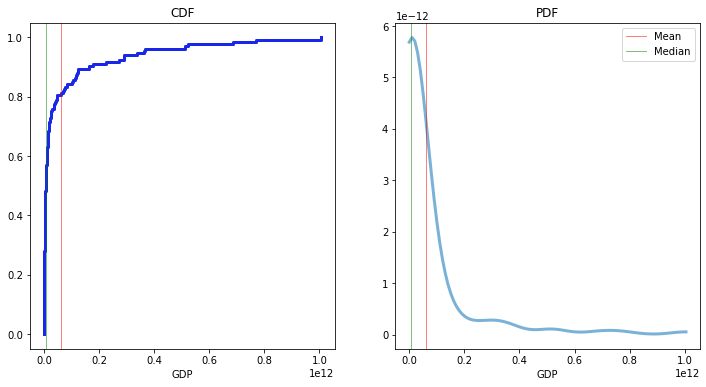

In [13]:
bigGraph(dfLE2, 'GDP',10)

In [14]:
dfLE2.columns

Index(['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population',
       'Schooling'],
      dtype='object')

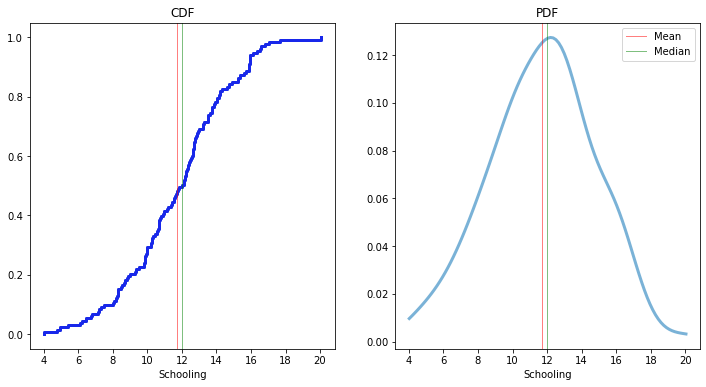

In [15]:
bigGraph(dfLE2, 'Schooling',10)

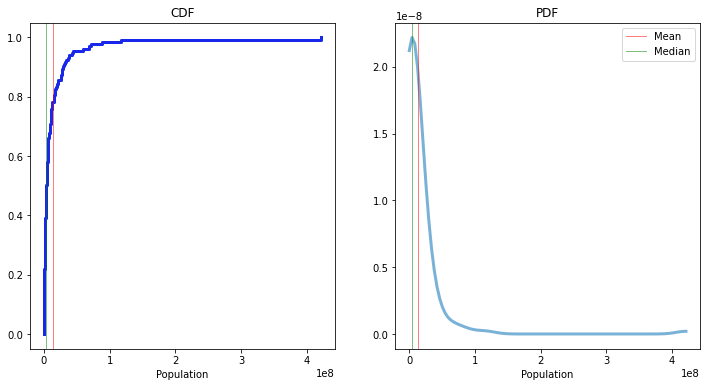

In [16]:
bigGraph(dfLE2, 'Population',10)

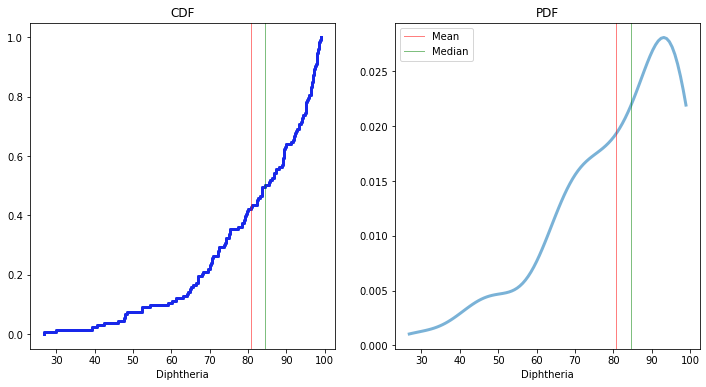

In [17]:
bigGraph(dfLE2, 'Diphtheria',10)

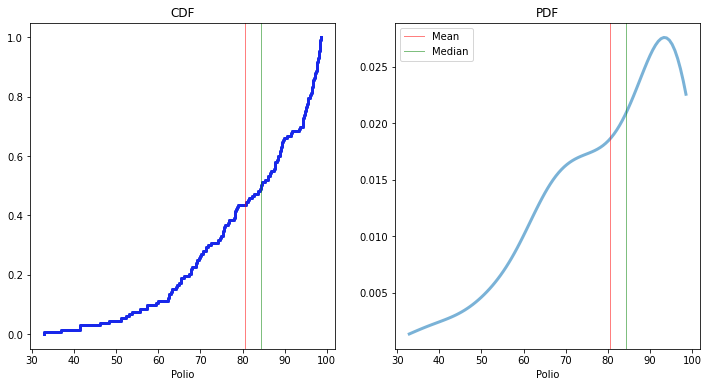

In [18]:
bigGraph(dfLE2, 'Polio',10)

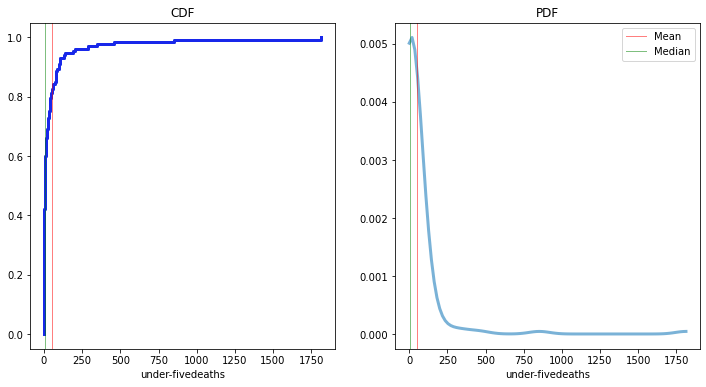

In [19]:
bigGraph(dfLE2, 'under-fivedeaths',10)

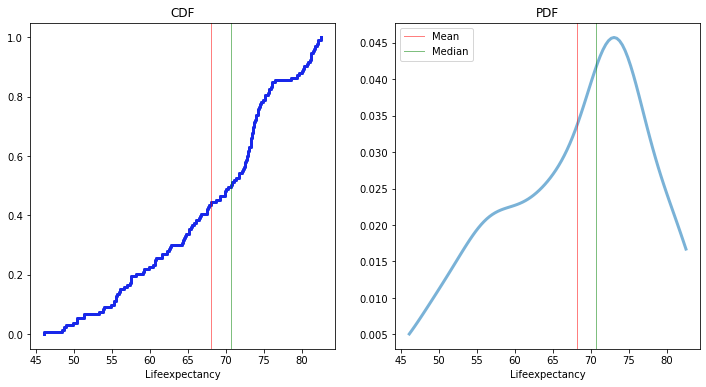

In [20]:
bigGraph(dfLE2, 'Lifeexpectancy',10)

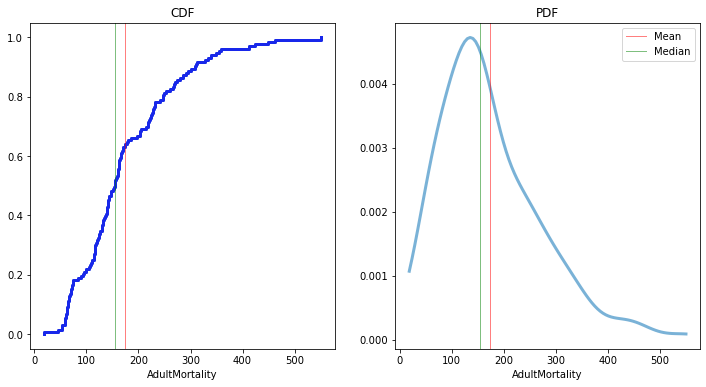

In [21]:
bigGraph(dfLE2, 'AdultMortality',10)

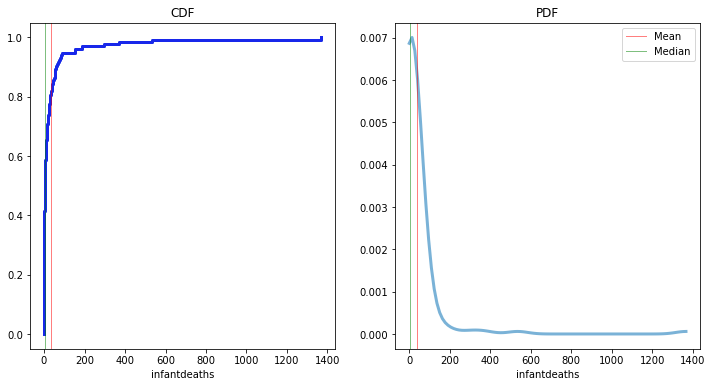

In [22]:
bigGraph(dfLE2, 'infantdeaths',10)

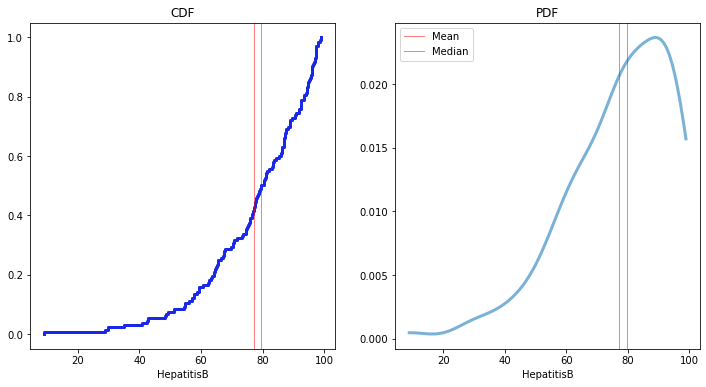

In [23]:
bigGraph(dfLE2, 'HepatitisB',10)

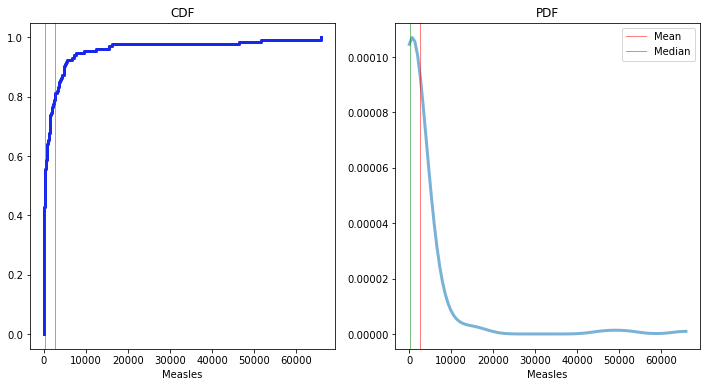

In [24]:
bigGraph(dfLE2, 'Measles',10)

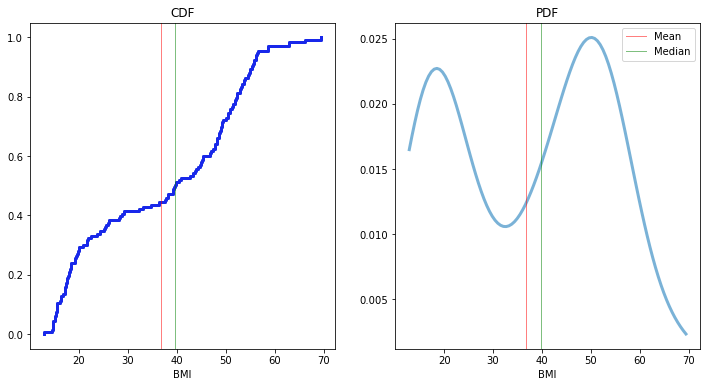

In [25]:
bigGraph(dfLE2, 'BMI',10)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

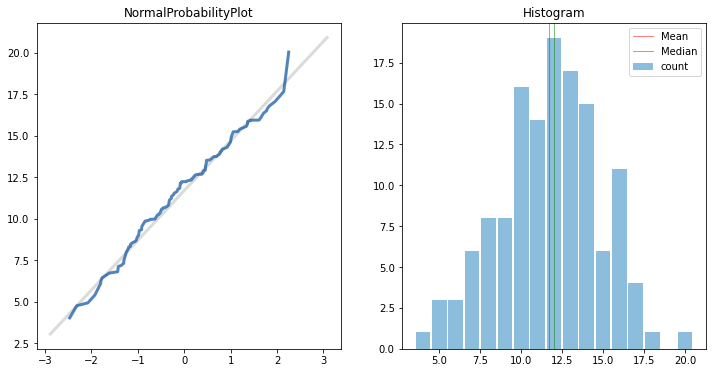

In [26]:
#Analytical for Schooling
#Histogram

hi = thinkstats2.Hist(round(dfLE2["Schooling"]), label="count")
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(dfLE2["Schooling"])
plt.title("NormalProbabilityPlot")
thinkplot.SubPlot(2)
thinkplot.Hist(hi)
plt.title("Histogram")
thinkplot.axvline(dfLE2["Schooling"].mean(), color="Red", label="Mean")
thinkplot.axvline(dfLE2["Schooling"].median(), color="Green", label="Median")
thinkplot.Config()

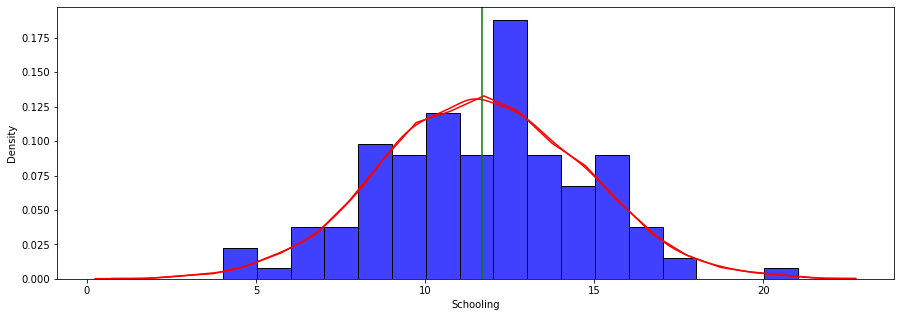

In [27]:
#Create a normal distribution based on the characteristics of the kinda-normal data
import scipy.stats

mu = dfLE2["Schooling"].mean()
sigma = dfLE2["Schooling"].std()
normz = scipy.stats.norm(mu, sigma)

sns.histplot(data=normz.rvs(10000), binwidth=1, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=dfLE2["Schooling"], binwidth=1, color="blue", stat="density")
plt.axvline(mu, color="green")

In [28]:
#Check Normality with code
k2, p = scipy.stats.normaltest(dfLE2["Schooling"])
p

0.8061408621435739

In [29]:

#NH - x comes from a normal distribution
k2, p = scipy.stats.normaltest(dfLE2["Schooling"])
p
alpha = .05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


In [30]:
#the percentage of that have a schooling level within 1 year of Canada
dfLE2["Schooling"]
normz.cdf(1)

0.00018806917282754434

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

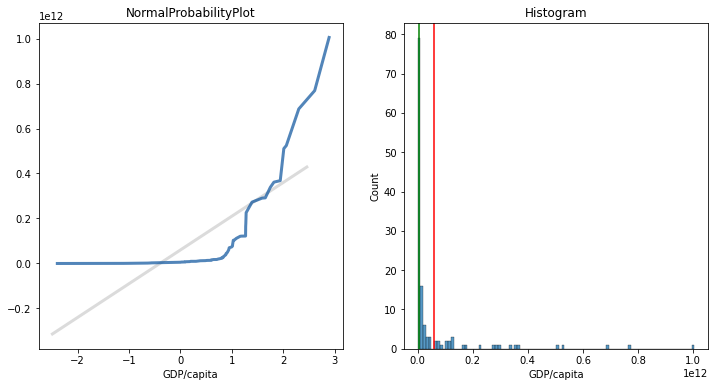

In [31]:
#Analytical for GDP/capita
#Histogram

hi = thinkstats2.Hist(dfLE2["GDP"])
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(dfLE2["GDP"])
plt.title("NormalProbabilityPlot")
plt.xlabel("GDP/capita")
thinkplot.SubPlot(2)
sns.histplot(dfLE2["GDP"])
plt.title("Histogram")
plt.xlabel("GDP/capita")
plt.axvline(dfLE2["GDP"].mean(), color="Red", label="Mean")
plt.axvline(dfLE2["GDP"].median(), color="Green", label="Median")


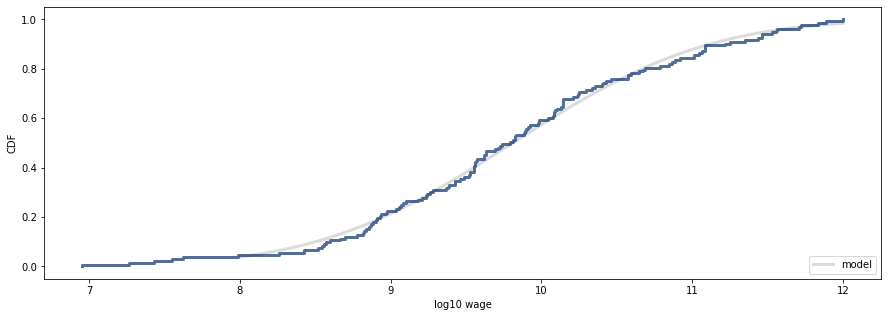

In [58]:
from cProfile import label
import scipy.stats
from scipy.stats import lognorm

# Create Log Transformed Data
log_GDP = np.log10(dfLE2["GDP"])
cdf_log = thinkstats2.Cdf(log_GDP)

#Compare distribution to LogNormal
mu, sigma = log_GDP.mean(), log_GDP.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=8, high=12)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')




A log Normal distribution was used.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

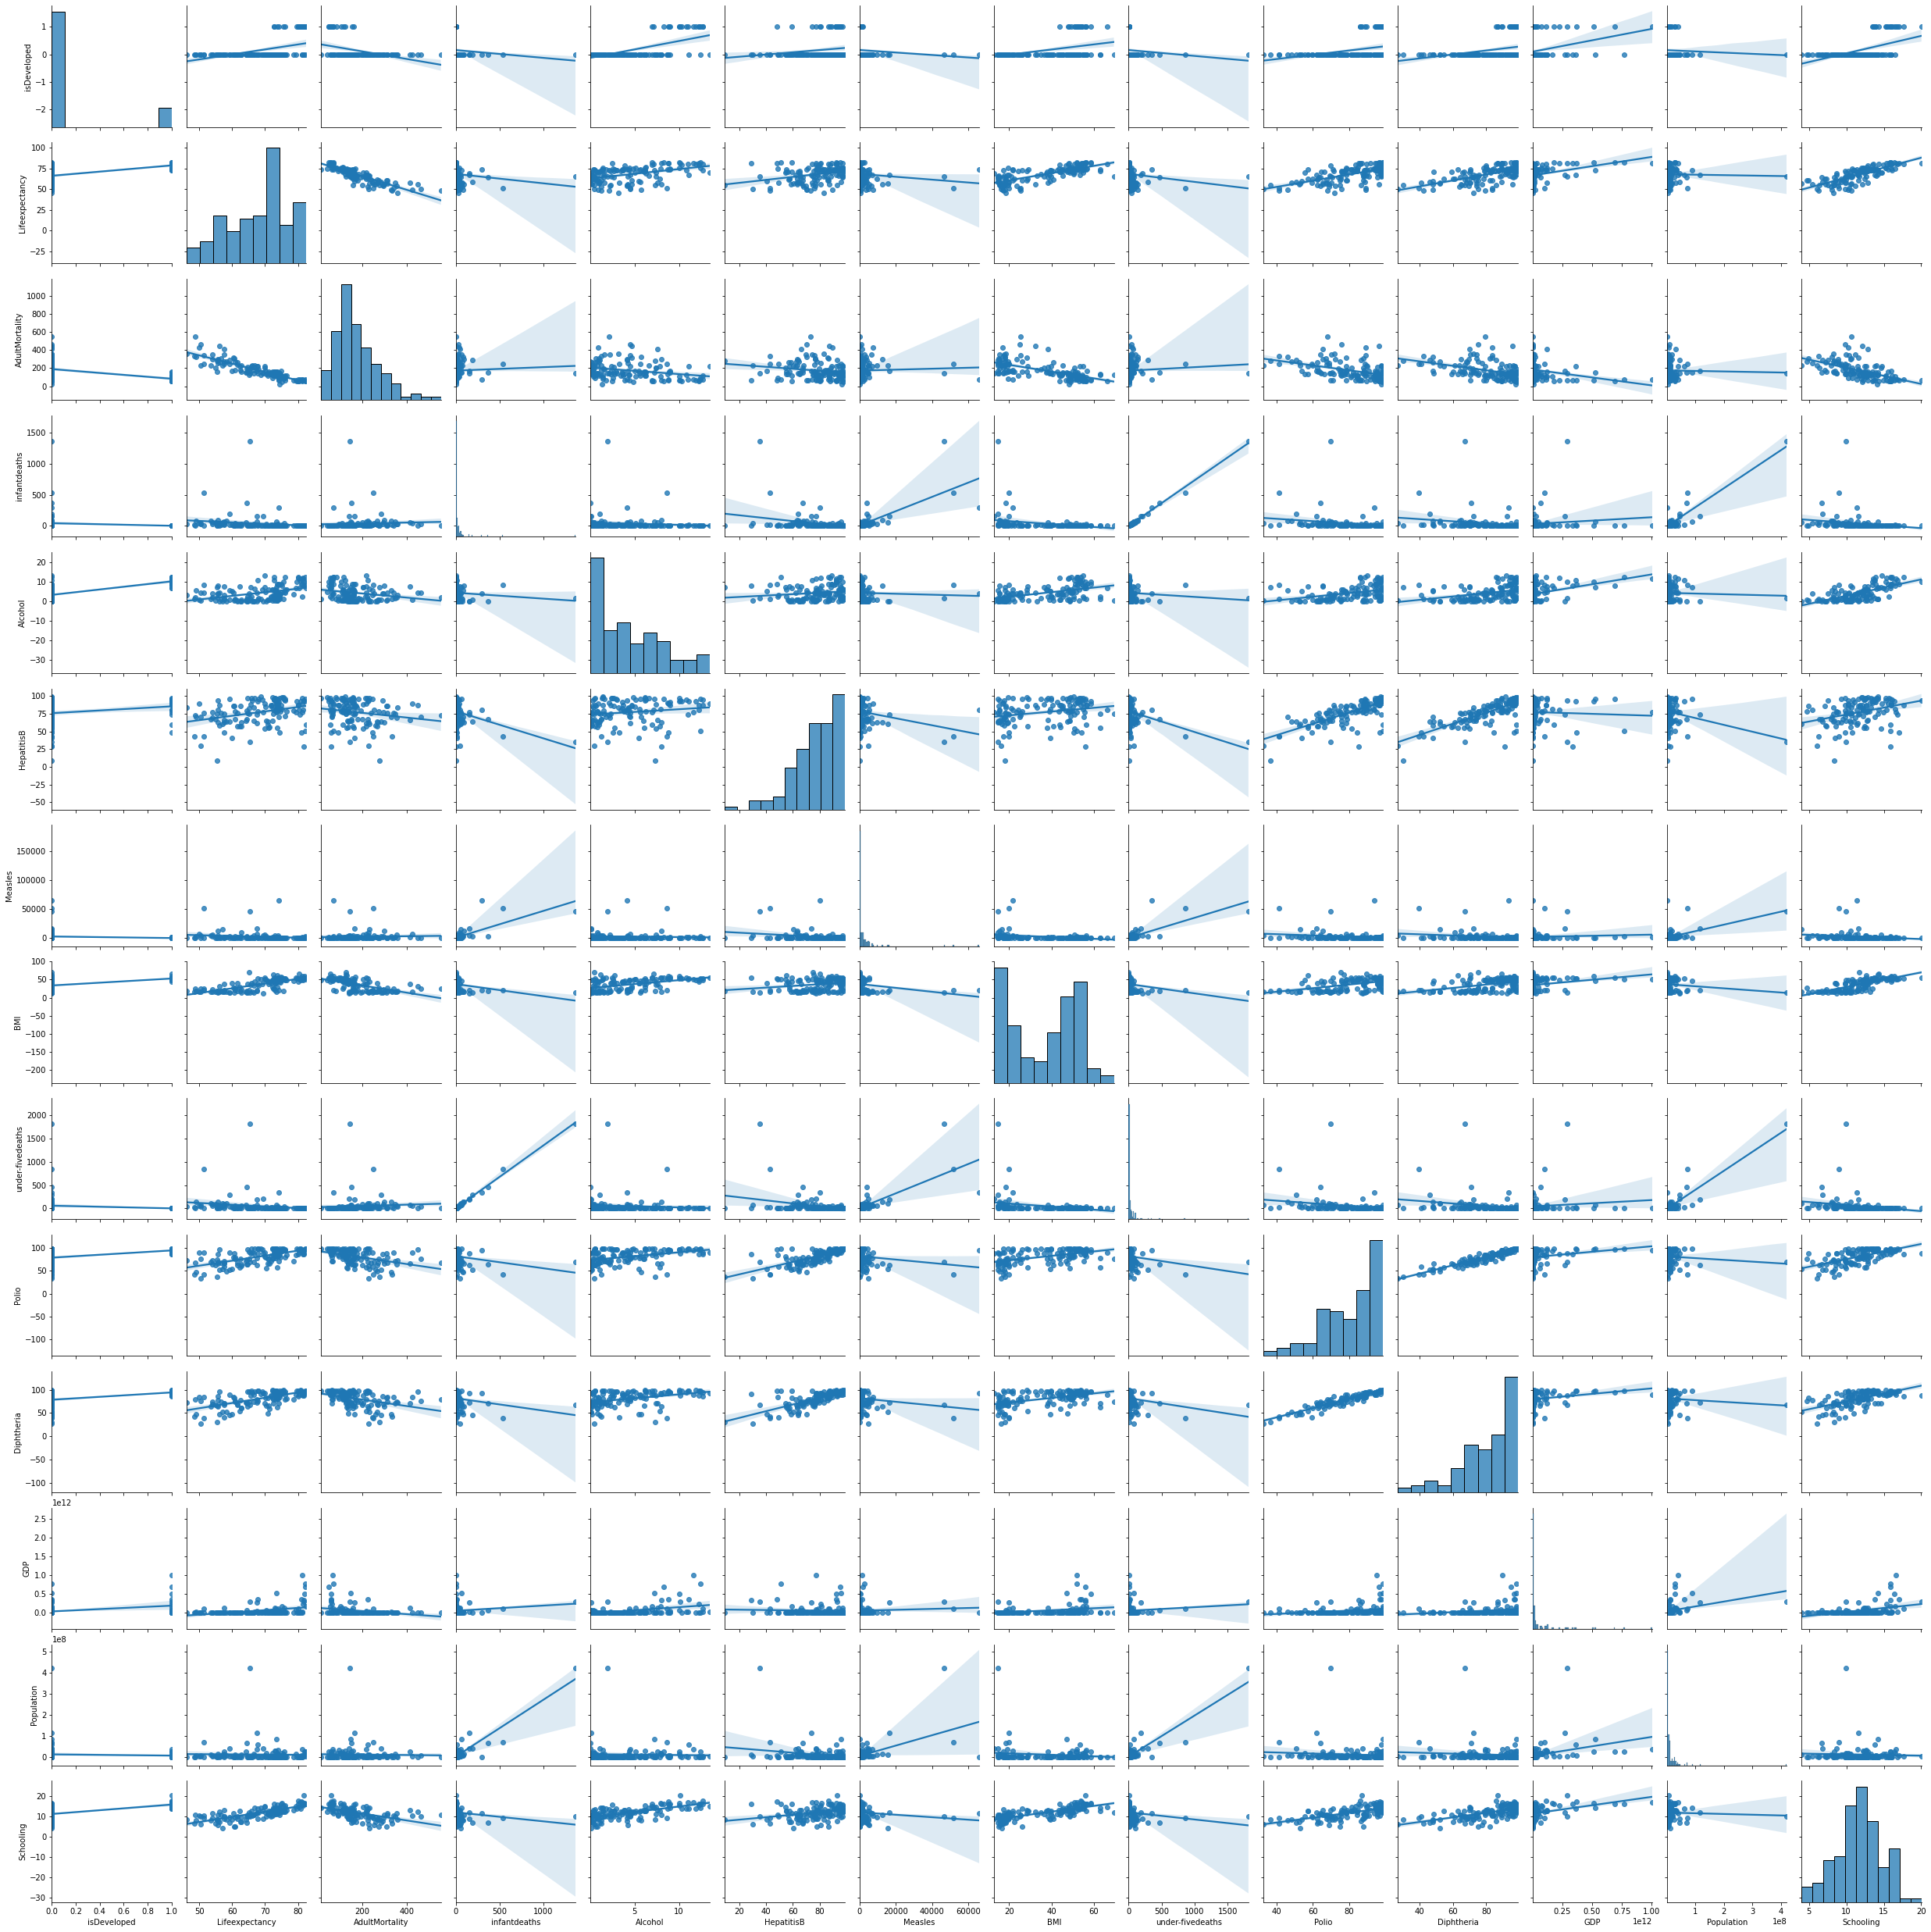

In [34]:
sns.pairplot(dfLE2, dropna=True, kind="reg")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [35]:
#Calculate correlations and analyze.
# #Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE[["isDeveloped"]]
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.sample(100)

dfLE.shape 
dfLE

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela(BolivarianRepublicof),0.0,73.38750,163.0000,9.3750,7.420000,66.250000,165.0000,54.48750,10.7500,74.6875,68.5000,0.000000e+00,NaN,12.78750
187,VietNam,0.0,74.77500,126.5625,29.1875,3.087333,87.538462,4232.9375,11.18750,36.5000,94.9375,91.7500,0.000000e+00,NaN,11.51250
188,Yemen,0.0,63.86250,211.8125,39.3750,0.047333,55.687500,2761.1875,33.48750,51.6250,67.1250,72.6250,0.000000e+00,NaN,8.50625
189,Zambia,0.0,53.90625,354.3125,33.4375,2.239333,69.818182,6563.8125,17.45000,52.3750,64.3750,74.2500,4.929321e+09,6.260246e+06,11.21250


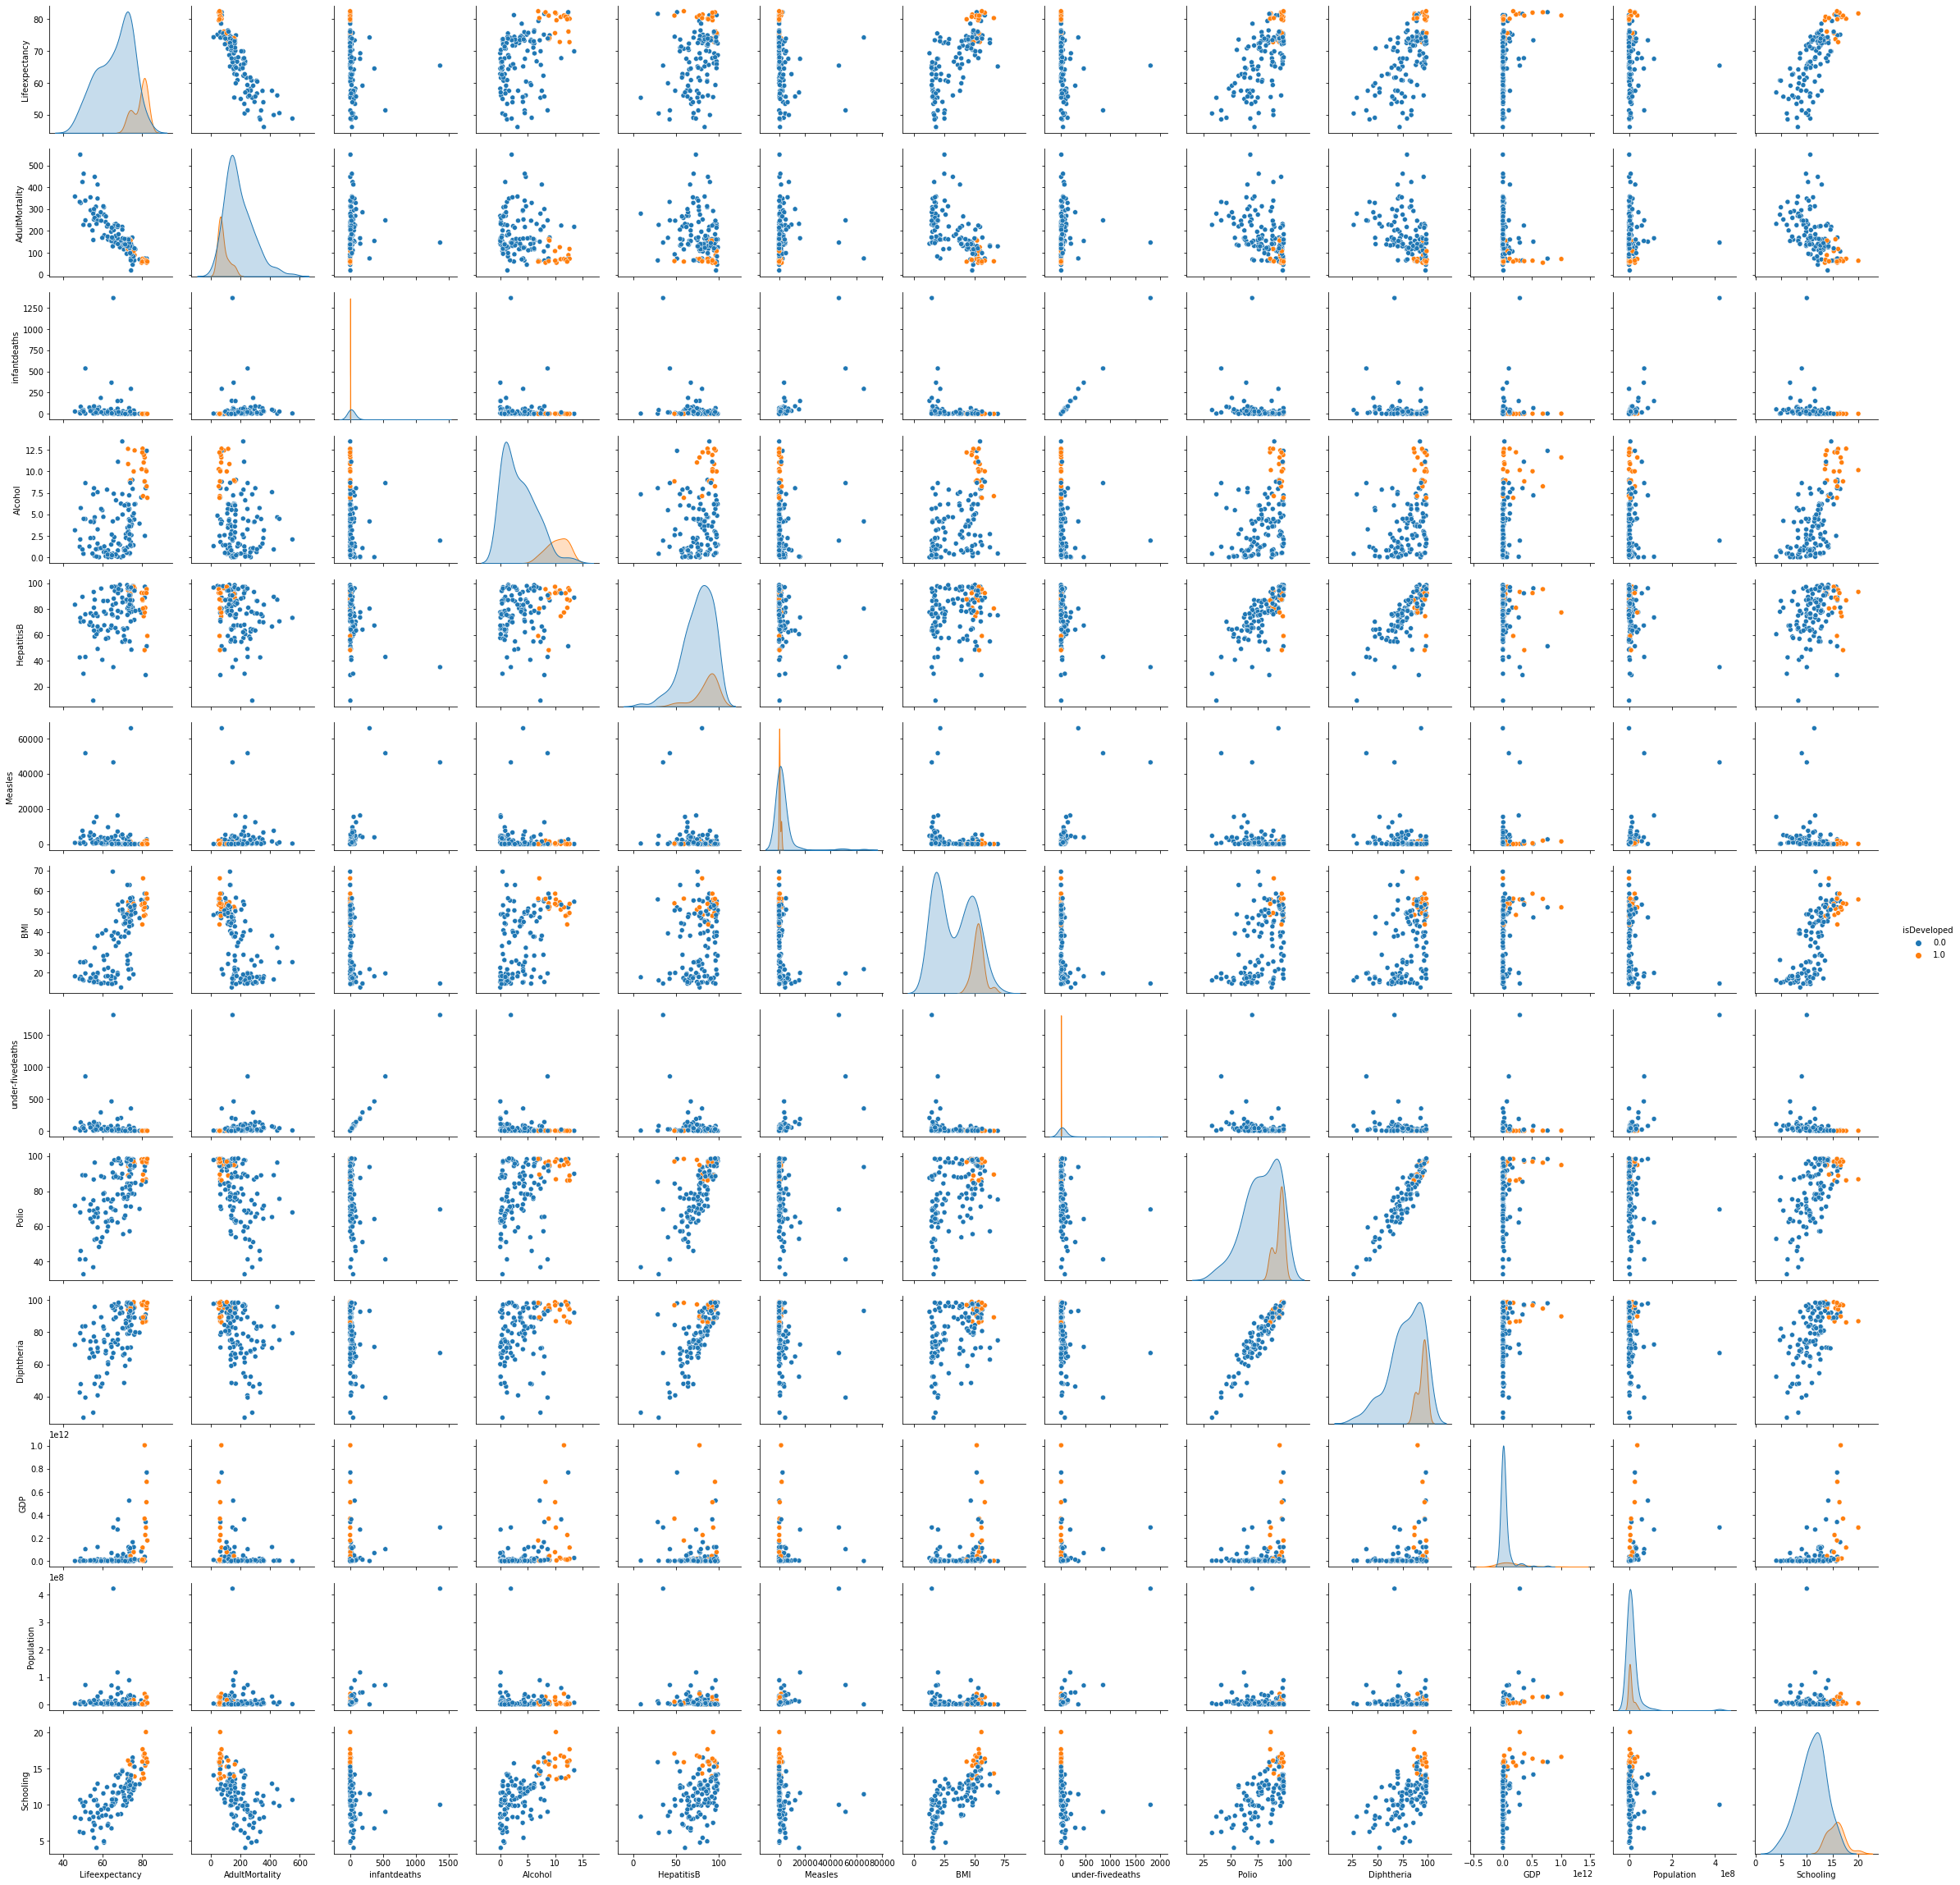

In [36]:
sns.pairplot(dfLE2, dropna=True, hue="isDeveloped")
plt.show()

#Strongest Relationship
-Life Expectancy and Adult Mortality
Develope- No Correlation
Developing- high negative correlation

Life Expectancy and Schooling
Developed- high positive correlation
Developing- high positive correlation

Life Expectancy and Polio
Developed-high positive correlation
Developing-No correlation

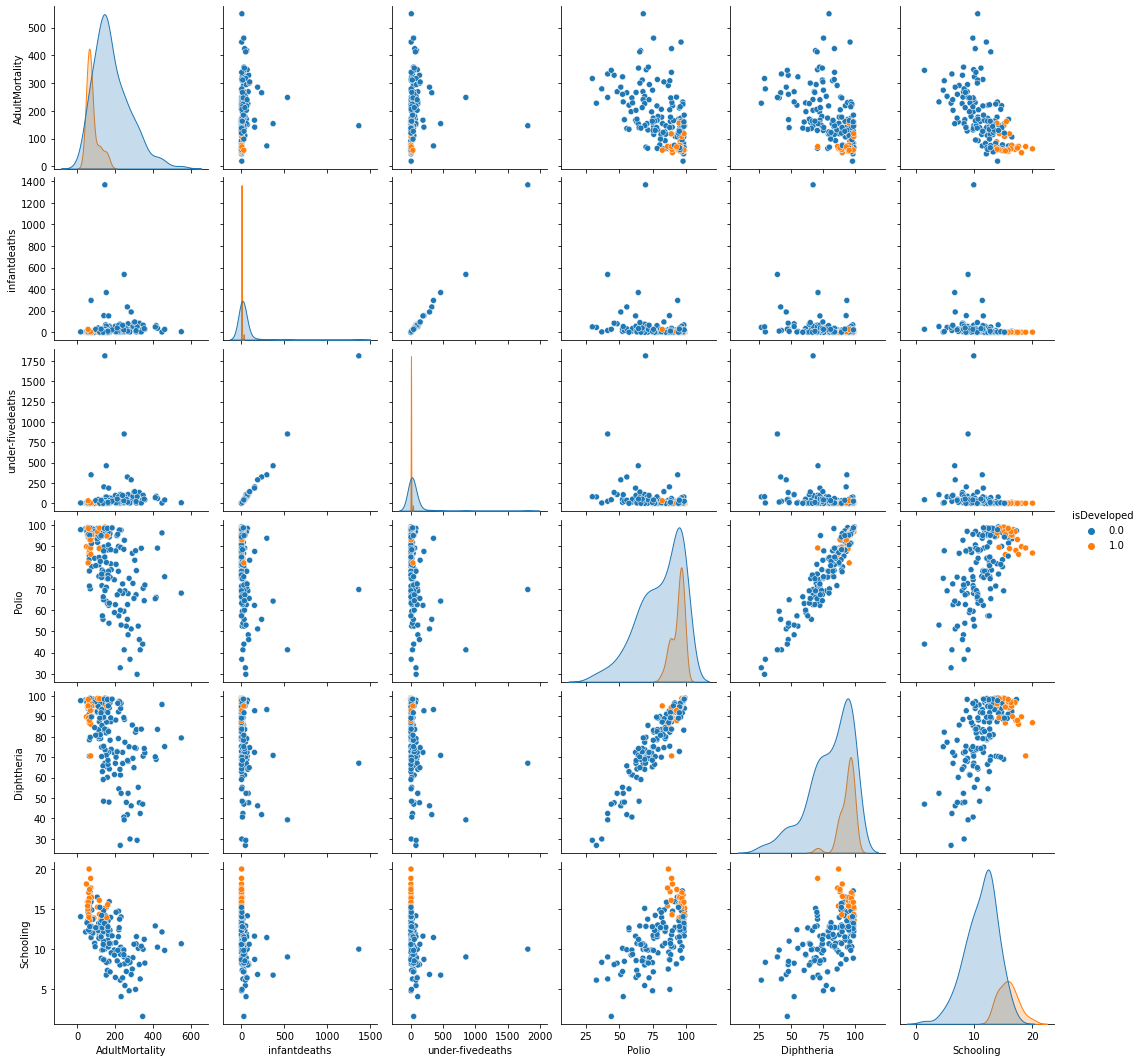

In [37]:
dfLE2 = dfLE.drop(columns=['Population','GDP', 'Lifeexpectancy', 'HepatitisB','Measles', 'BMI','Alcohol'])
dfLE2.head()
sns.pairplot(dfLE2, dropna=True, hue="isDeveloped")
plt.show()


#Question 5b
No and Poor correlaion within columns such as population,GDP,life espectancy, Adult Mortality,Alchohol,Hepatitis,BMI,Measles will be dropped as they show poor to low correlation


High Postitive Correlation  between Polio and Diphtheria
Postitive Correlation  between Underfivedeaths and Infantdeath

Several studies have shown that children mortality occures mostly with children under the age of Five .The positive correlations  proves the theories that have been recorded on wikipedia are true

Several studies have shown that same vaccine is used for patient with polio and Diptheria .The positive correlations  proves the theories that have been recorded are true 

Question 5c
Life Expectancy and Adult Mortality- Developed shows no correlation, while Developing shows negative correlation
Life Expectancy and GDP- Developed shows growing positive correlation, while Develpoing shows no correlation